In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
Name: target, dtype: float64


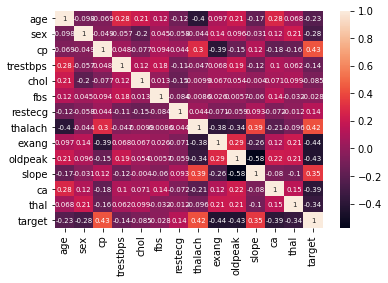

In [2]:
df = pd.read_csv('heart.csv')
feature_titles = df.columns[:-1].to_numpy()
labels = df.iloc[:,-1].to_numpy()
corr =df.corr()
sns.heatmap(corr,annot = True,annot_kws={"size":7})
target_correlation = corr["target"].drop ('target',axis=0)
#outputting highest correlations
print(target_correlation.sort_values())


78
['age', 'sex']


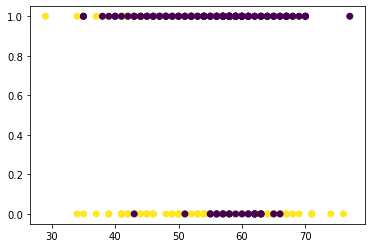

['age', 'cp']


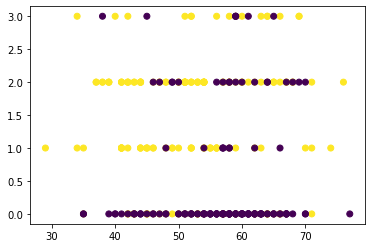

['age', 'trestbps']


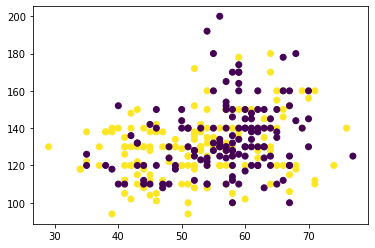

['age', 'chol']


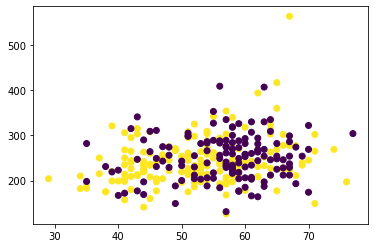

['age', 'fbs']


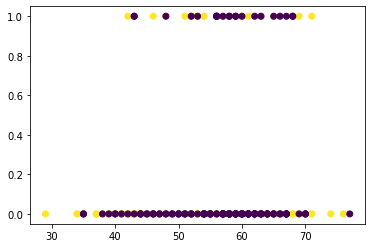

['age', 'restecg']


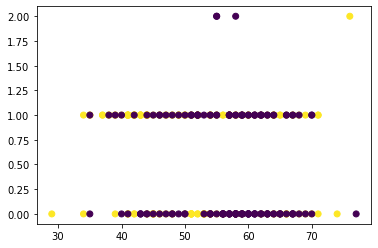

['age', 'thalach']


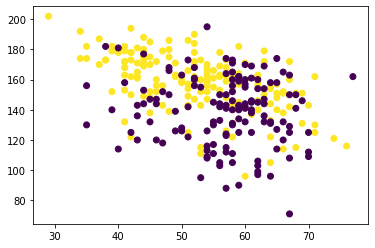

['age', 'exang']


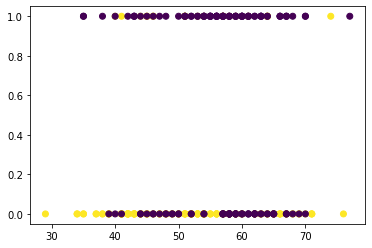

['age', 'oldpeak']


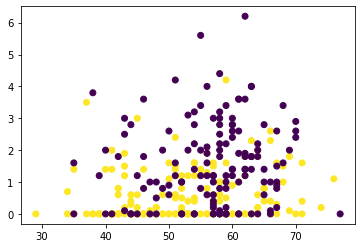

['age', 'slope']


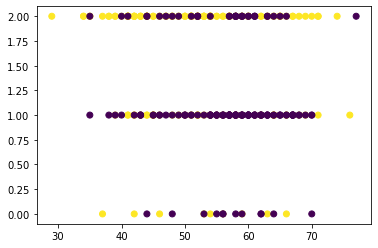

['age', 'ca']


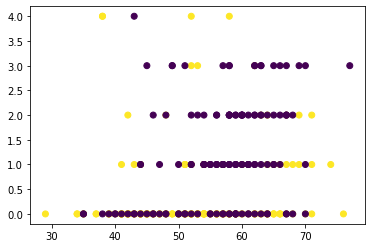

['age', 'thal']


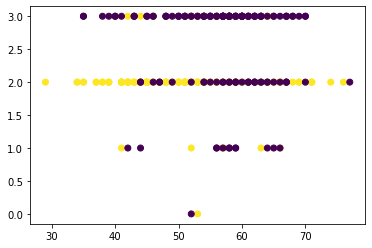

['sex', 'cp']


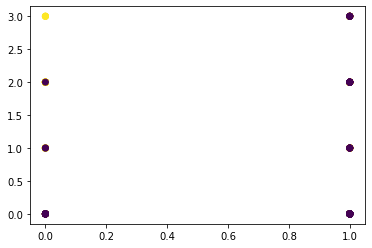

['sex', 'trestbps']


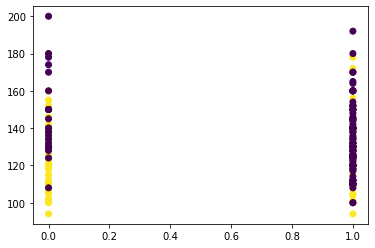

['sex', 'chol']


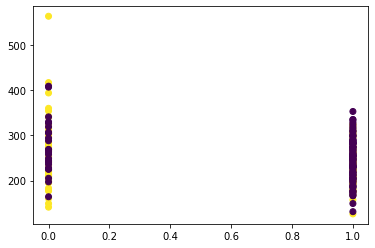

['sex', 'fbs']


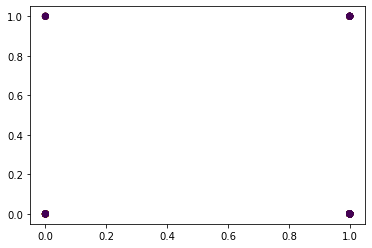

['sex', 'restecg']


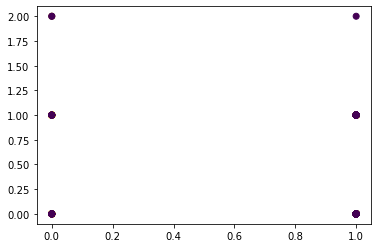

['sex', 'thalach']


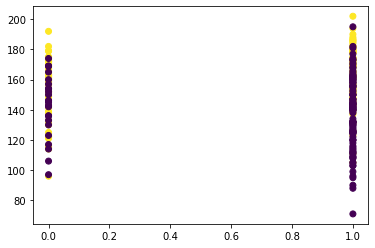

['sex', 'exang']


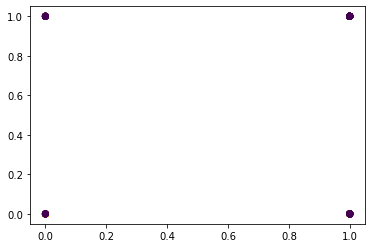

['sex', 'oldpeak']


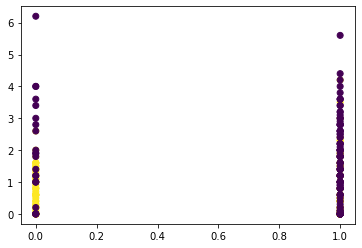

['sex', 'slope']


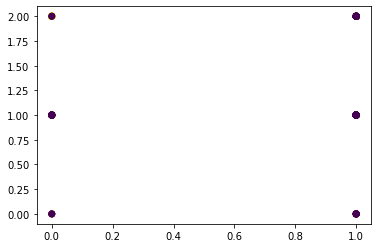

['sex', 'ca']


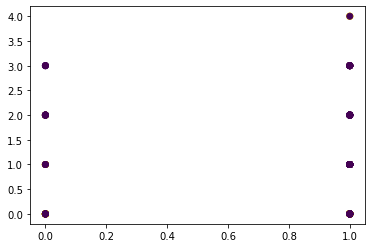

['sex', 'thal']


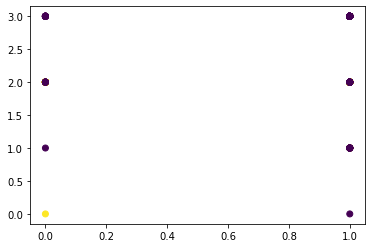

['cp', 'trestbps']


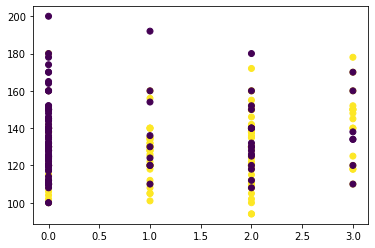

['cp', 'chol']


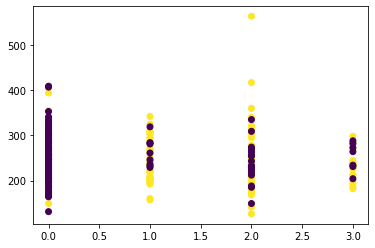

['cp', 'fbs']


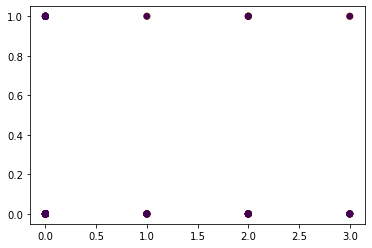

['cp', 'restecg']


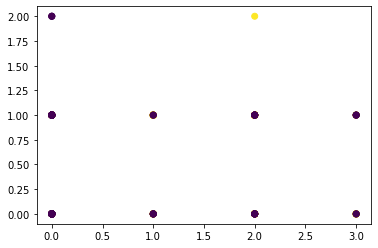

['cp', 'thalach']


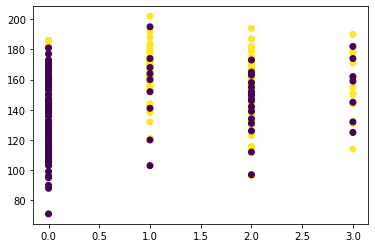

['cp', 'exang']


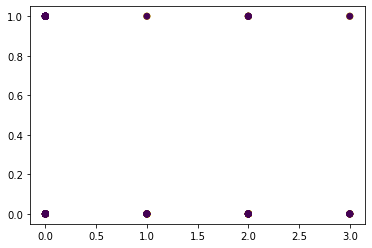

['cp', 'oldpeak']


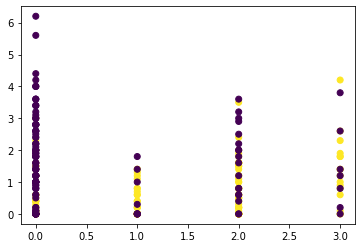

['cp', 'slope']


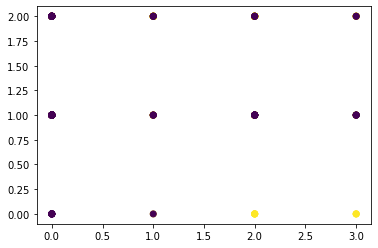

['cp', 'ca']


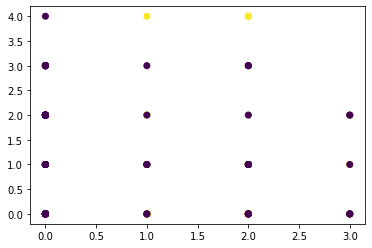

['cp', 'thal']


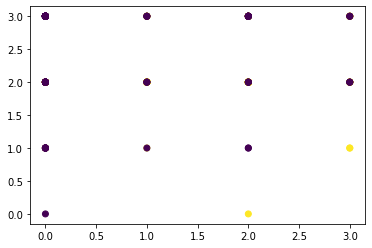

['trestbps', 'chol']


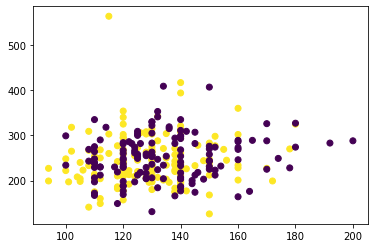

['trestbps', 'fbs']


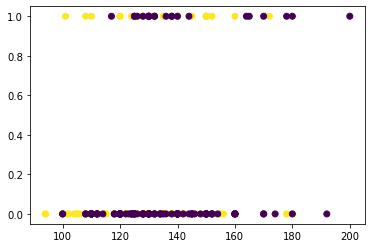

['trestbps', 'restecg']


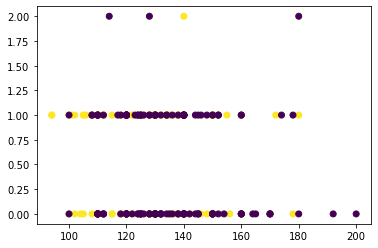

['trestbps', 'thalach']


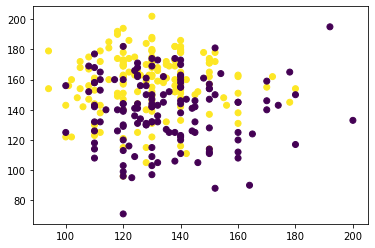

['trestbps', 'exang']


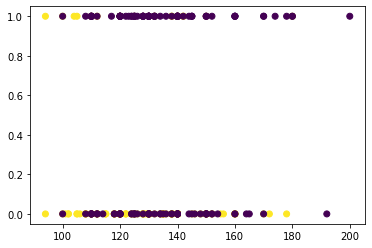

['trestbps', 'oldpeak']


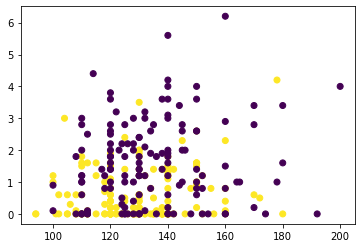

['trestbps', 'slope']


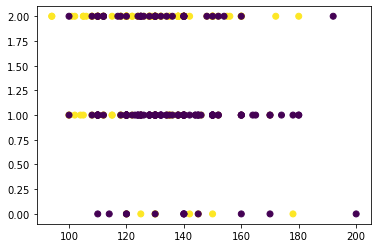

['trestbps', 'ca']


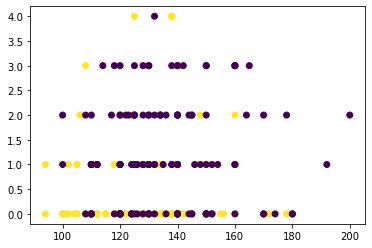

['trestbps', 'thal']


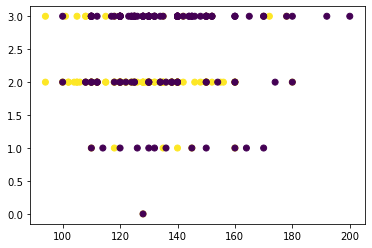

['chol', 'fbs']


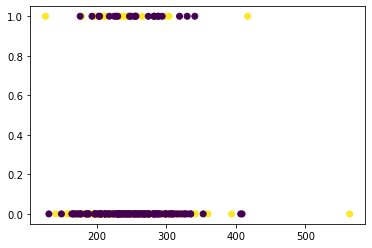

['chol', 'restecg']


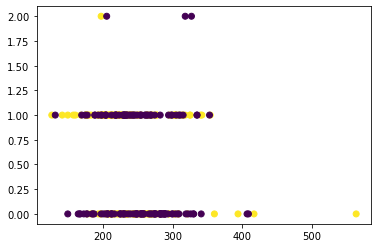

['chol', 'thalach']


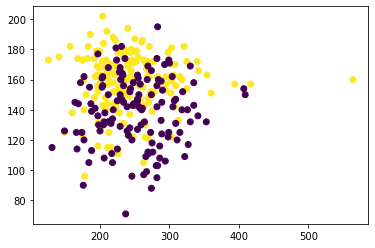

['chol', 'exang']


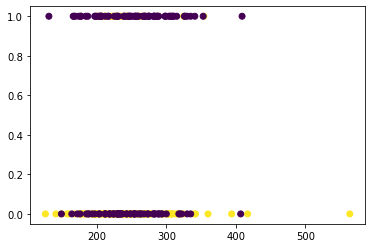

['chol', 'oldpeak']


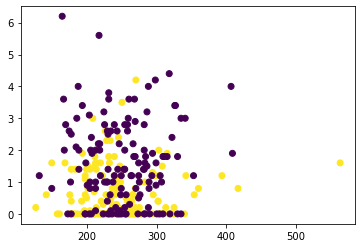

['chol', 'slope']


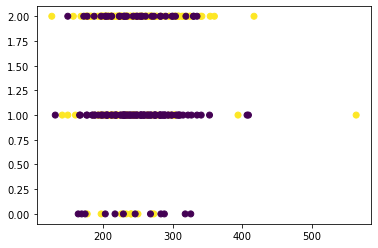

['chol', 'ca']


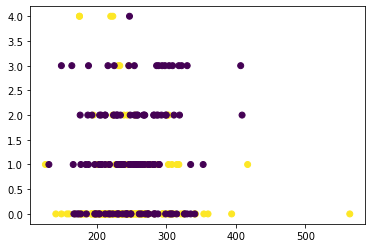

['chol', 'thal']


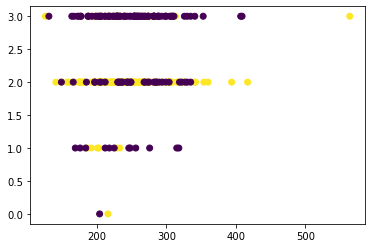

['fbs', 'restecg']


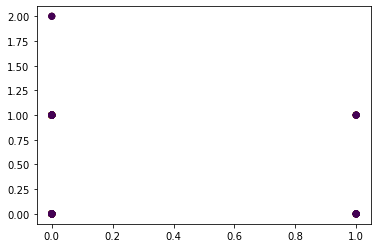

['fbs', 'thalach']


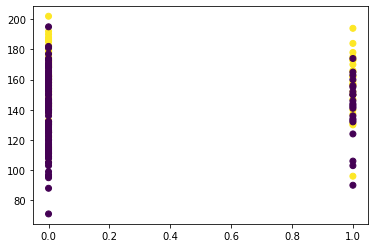

['fbs', 'exang']


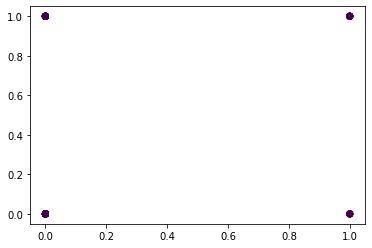

['fbs', 'oldpeak']


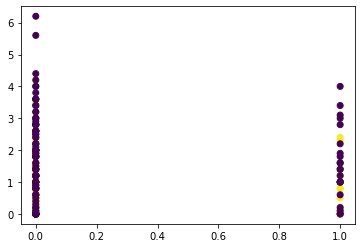

['fbs', 'slope']


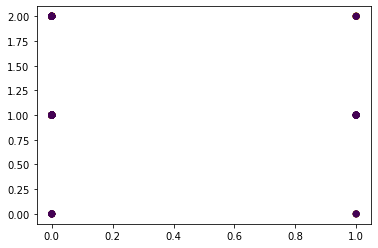

['fbs', 'ca']


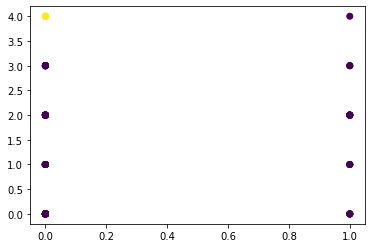

['fbs', 'thal']


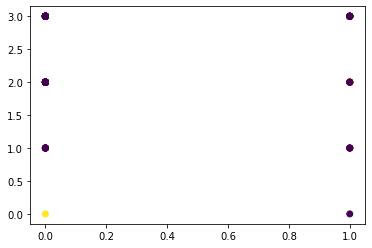

['restecg', 'thalach']


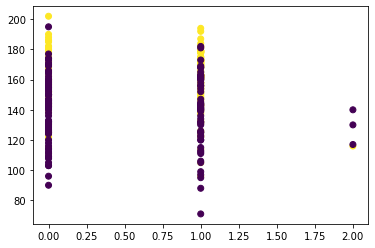

['restecg', 'exang']


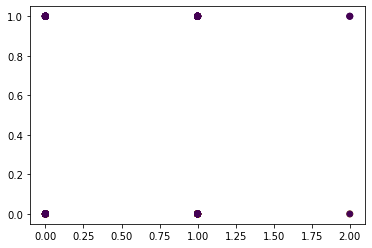

['restecg', 'oldpeak']


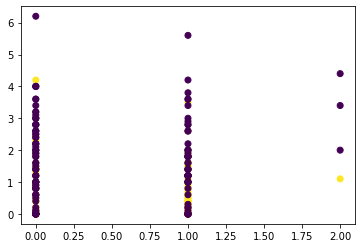

['restecg', 'slope']


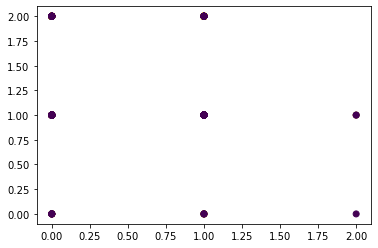

['restecg', 'ca']


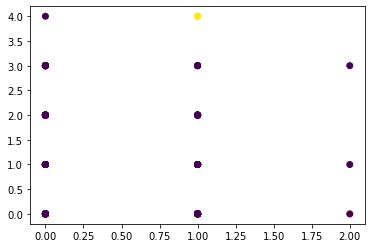

['restecg', 'thal']


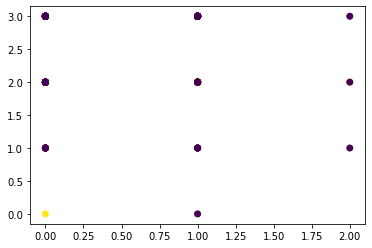

['thalach', 'exang']


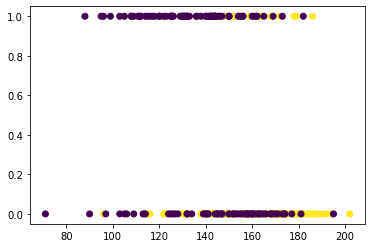

['thalach', 'oldpeak']


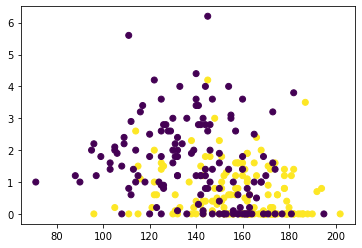

['thalach', 'slope']


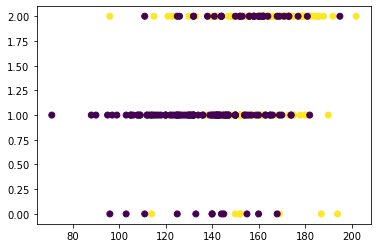

['thalach', 'ca']


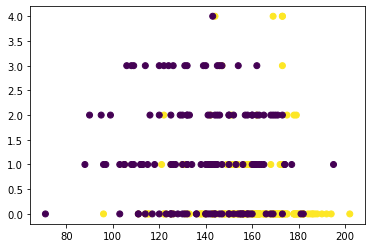

['thalach', 'thal']


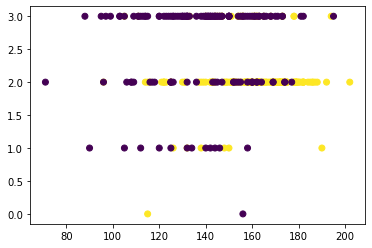

['exang', 'oldpeak']


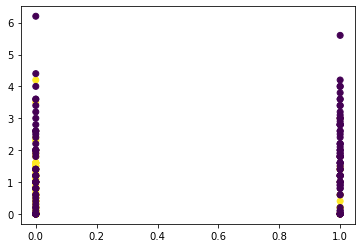

['exang', 'slope']


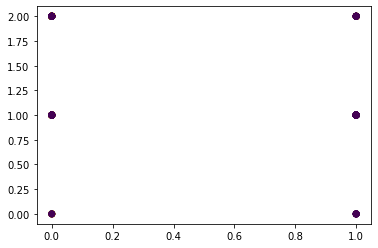

['exang', 'ca']


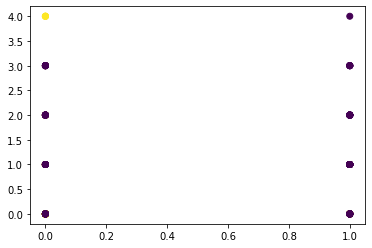

['exang', 'thal']


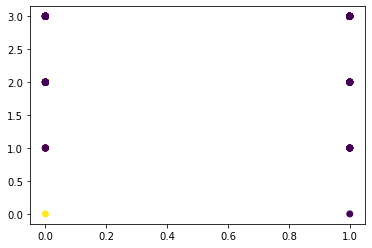

['oldpeak', 'slope']


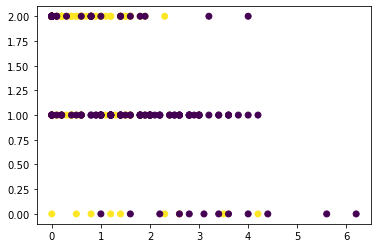

['oldpeak', 'ca']


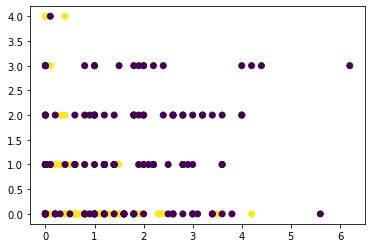

['oldpeak', 'thal']


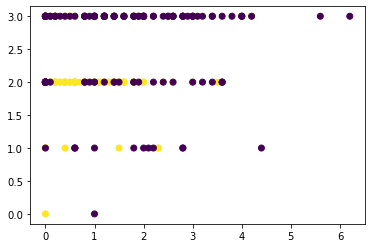

['slope', 'ca']


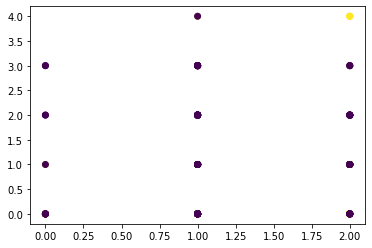

['slope', 'thal']


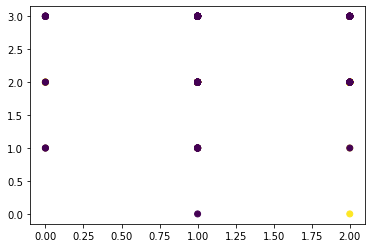

['ca', 'thal']


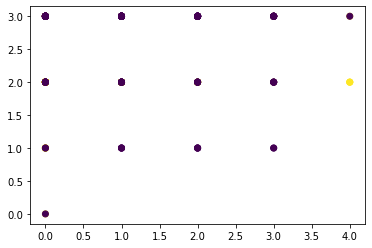

In [3]:
import itertools
from sklearn.preprocessing import normalize

# get all possible feature pairs to choose features
possible_feature_pairs = []
for result in itertools.combinations(feature_titles, 2):
    possible_feature_pairs.append(list(result))

print(len(possible_feature_pairs))
for pair in possible_feature_pairs:
    print(pair)
    test_x = df[pair[0]].values
    test_y = df[pair[1]].values
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(test_x, test_y, c=df.target)
    plt.show()

In [4]:
#function that calculates sigmoid of y
def sigmoid(g):
    return 1 / (1+ np.exp(-g))

In [5]:
#funciton that calculates the cost
def compute_cost(x,y,w):
    m = len(y)
    h = sigmoid (x @ w)
    epsilon = 1e-5
    cost_value = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost_value

In [6]:
#function to calculate the gradient descent
def gradient_descent(X_train,y_train,learning_rate,iterations,params):
    m = len(y_train)
    h = sigmoid (X_train @ w)
    cost_history = np.zeros((iterations,1))
    for i in range(iterations):
        params = params - (learning_rate/m) * (X_train.T @ np.subtract(h, y_train))
        cost_history[i] = compute_cost(X_train, y_train, params)
    return (cost_history, params)

In [7]:
#function to predict new samples
def predict(x,w):
    return np.round(sigmoid(x @ w))

In [8]:
#Main 
from sklearn.model_selection import train_test_split
# split into test & train

print(pair)
features = df[['cp', 'oldpeak']].to_numpy()
#features = df[['cp', 'exang']].to_numpy()
labels = df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

y_train = y_train.reshape(-1,1);
y_test = y_test.reshape(-1,1);

m = len(y_train)
X_training = np.hstack((np.ones((m,1)),X_train))
n = np.size(X_training,1)
w=np.random.rand(n,1)
iterations = 100
learning_rate= 0.01
cost, w_opt = gradient_descent(X_training,y_train,learning_rate,iterations,w)
print("Initial Cost is: {} \n".format(cost[0]))
print("Cost History is: {} \n", cost, "\n")
print("Optimal Parameters are: \n", w_opt, "\n")


#print("Optimal Parameters are: \n", h_new, "\n")
#iter= np.arange (100)
#plt.plot (iter,cost)

['ca', 'thal']
Initial Cost is: [0.73651529] 

Cost History is: {} 
 [[0.73651529]
 [0.73398803]
 [0.73147404]
 [0.7289734 ]
 [0.7264862 ]
 [0.72401252]
 [0.72155246]
 [0.71910609]
 [0.7166735 ]
 [0.71425478]
 [0.71185002]
 [0.70945929]
 [0.70708268]
 [0.70472028]
 [0.70237216]
 [0.70003841]
 [0.69771912]
 [0.69541435]
 [0.6931242 ]
 [0.69084874]
 [0.68858806]
 [0.68634222]
 [0.68411131]
 [0.6818954 ]
 [0.67969458]
 [0.67750891]
 [0.67533847]
 [0.67318333]
 [0.67104357]
 [0.66891926]
 [0.66681046]
 [0.66471725]
 [0.66263969]
 [0.66057786]
 [0.65853182]
 [0.65650163]
 [0.65448736]
 [0.65248907]
 [0.65050682]
 [0.64854067]
 [0.64659069]
 [0.64465693]
 [0.64273944]
 [0.64083829]
 [0.63895353]
 [0.6370852 ]
 [0.63523337]
 [0.63339808]
 [0.63157937]
 [0.62977731]
 [0.62799193]
 [0.62622328]
 [0.6244714 ]
 [0.62273634]
 [0.62101813]
 [0.61931682]
 [0.61763243]
 [0.61596502]
 [0.61431461]
 [0.61268123]
 [0.61106493]
 [0.60946572]
 [0.60788364]
 [0.60631871]
 [0.60477097]
 [0.60324044]
 [0.601

In [9]:
#predict
m = len(y_test)
X_testing = np.hstack((np.ones((m,1)),X_test))
y_predict = predict(X_testing,w_opt)
from sklearn import metrics

results = metrics.accuracy_score(y_predict, y_test)
print(results)

0.8289473684210527
